In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [78]:
data  = pd.read_csv('insurance.csv')

In [79]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [80]:
data.shape

(1338, 7)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [82]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\Ratul\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

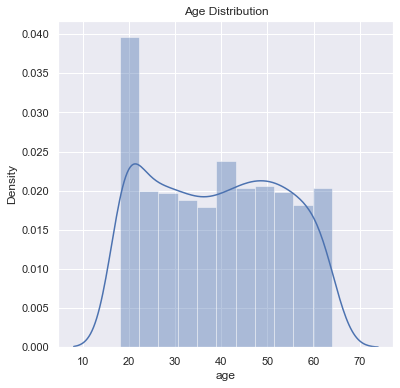

In [83]:
# distribution of age value
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(data['age'])
plt.title("Age Distribution")
plt.show

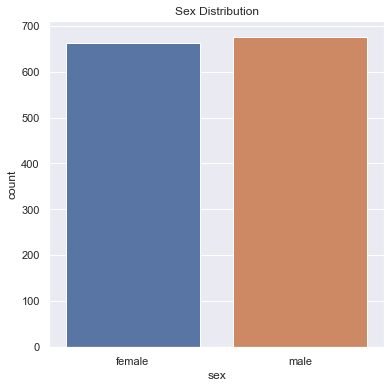

In [84]:
 # distribution of gender column
plt.figure(figsize=(6,6))
sns.countplot(x ='sex', data = data)
plt.title('Sex Distribution')
plt.show()

In [85]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\Ratul\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


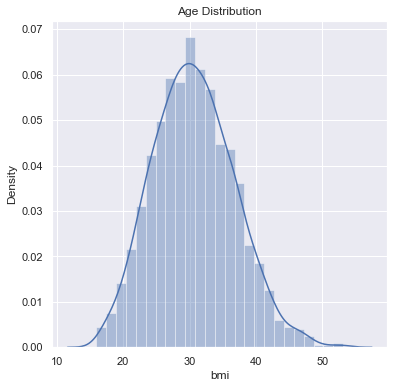

In [86]:
# bmi distribution

plt.figure(figsize =(6,6))
sns.distplot(data['bmi'])
plt.title('Age Distribution')
plt.show()

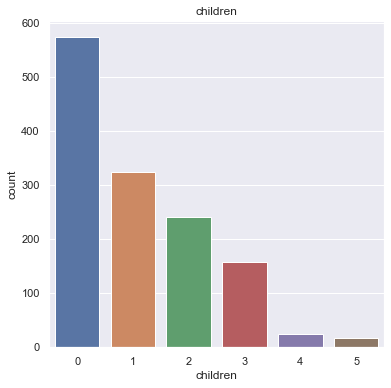

In [87]:
#children column

plt.figure(figsize=(6,6))
sns.countplot(x = 'children', data = data)
plt.title('children')
plt.show()

In [88]:
# Checking for missing values

data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [89]:
# data preprocessing
# encoding the categorical features

data.replace({'sex' : {'male':0, 'female':1}}, inplace = True)
data.replace({'smoker': {'yes': 0, 'no' : 1}}, inplace = True)
data.replace({'region' : {'southeast' : 0, 'southwest' : 1, 'northeast': 2, 'northwest': 3}}, inplace = True)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [90]:
x = data.drop(columns = 'charges', axis = 1)
y = data['charges']
print(x)
print(y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [91]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

In [92]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [93]:
# model training

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [96]:
training_data_prediction = regressor.predict(x_train)

In [98]:
r2_train = metrics.r2_score(y_train, training_data_prediction)
print(r2_train)

0.751505643411174


In [102]:
test_data_prediction = regressor.predict(x_test)
r2_test = metrics.r2_score(y_test, test_data_prediction)
print(r2_test)

0.7447273869684077


In [103]:
# build a predictive system

In [108]:
input =  (31,1, 25.74, 0, 1, 0)

#  changing input data to a numpy array
input_data_as_numpy_array = np.array(input)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = regressor.predict(input_data_reshaped)
print(prediction)

[3760.0805765]


C:\Users\Ratul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
